#### Task Preprocessing

Prepare the dataset by applying an appropriate normalization method to the variables. <br>
Should you normalize the outcome variable? <br>
Should you use the same method for all variables or decide for each variable individually?

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [108]:
#df = pd.read_csv("../data/diabetes_cleaned.csv")
df = pd.read_csv("../data/diabetes_cleaned.csv")

#df = df.drop('Mahalanobis_Distance', axis=1)
#df = df.drop('Multivariate_Outlier', axis=1)

df = df.dropna()
#df.to_csv("../data/data_selfmade.csv", index=False)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Mahalanobis_Distance', 'Multivariate_Outlier'],
      dtype='object')

In [109]:
#z_scaler = StandardScaler()
#z_scaled = z_scaler.fit_transform(df) # z-score scaling
#df_z_scaled = pd.DataFrame(z_scaled, columns=df.columns)

#
# USE THE SAME SCALING FOR ALL TO MAINTAIN 0-1 RANGE
#

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df)
df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=df.columns)

#### Task PCA

1) Perform PCA on all input variables.
2) Use a screeplot and the elbow method to decide how many PCs should be included in further analysis. How much variance is explained by the chosen PCs?
3) Interprete the eigenvectors/loadings of the 2 PCs with the highest eigenvalue. Use a visualization method for explanation.
4) Split the dataset by "Outcome". Perform PCA for both subsets. Are there clearly visible differences in the PCs? What does that mean?

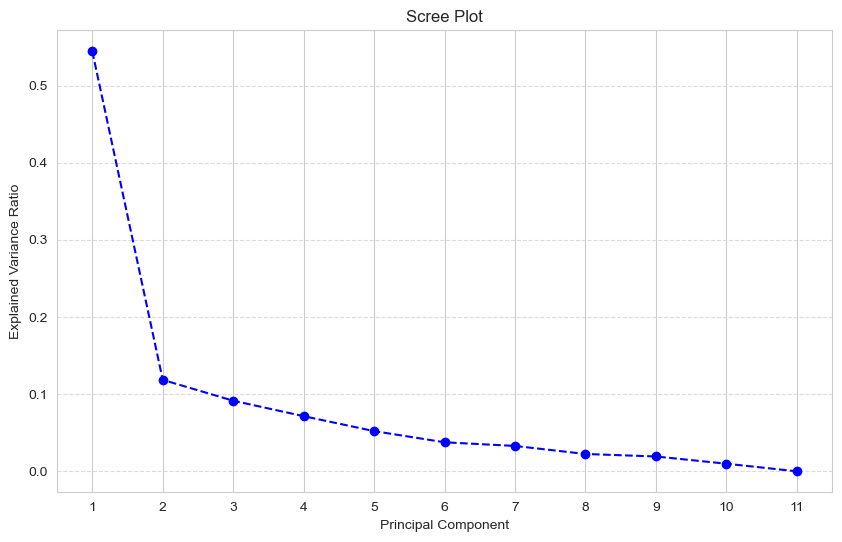

In [110]:
# Perform PCA
pca = PCA()
pca.fit(df_minmax_scaled)

pca_df = pca.transform(df_minmax_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Match x-axis to principal components
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

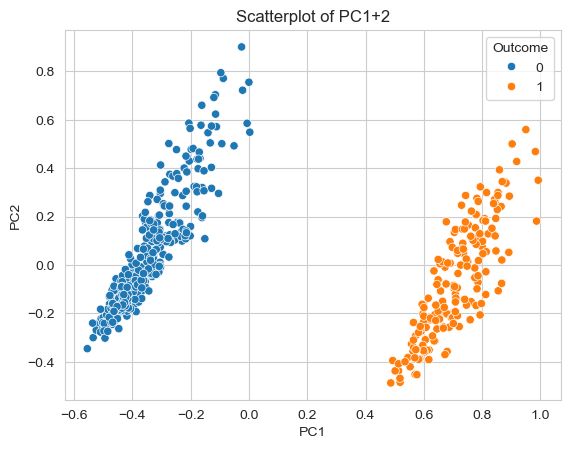

In [111]:

df_pca = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(len(df.columns))])

df_pca['Outcome'] = df['Outcome'].values
df_pca['Glucose'] = df['Glucose'].values
df_pca['BloodPressure'] = df['BloodPressure'].values
df_pca['BMI'] = df['BMI'].values

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue="Outcome")

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot of PC1+2')

# Show the plot
plt.show()

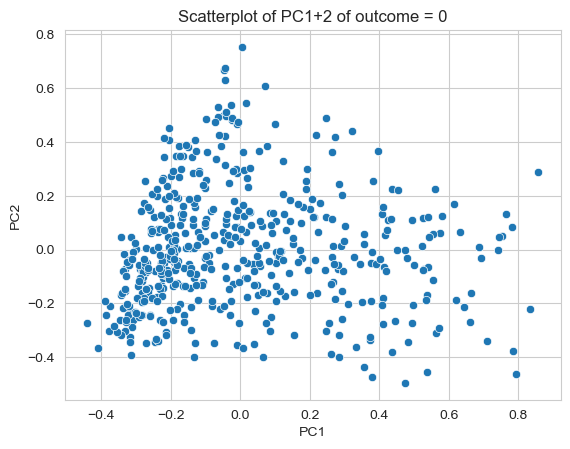

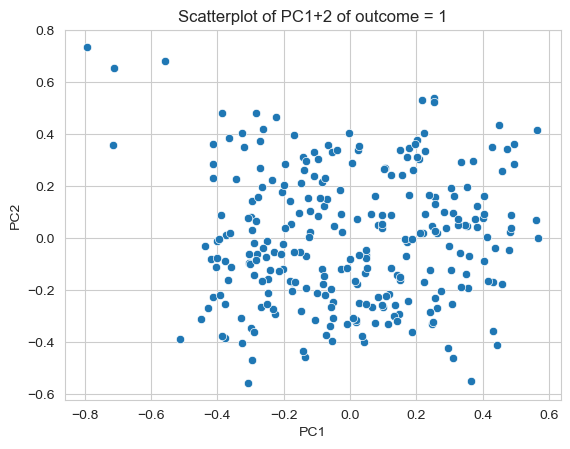

In [88]:
def perform_pca(df_original, plottitle = ""):
    minmax_scaler = MinMaxScaler()
    minmax_scaled = minmax_scaler.fit_transform(df_original)
    df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=df_original.columns)
    pca = PCA()
    pca.fit(df_minmax_scaled)
    pca_df = pca.transform(df_minmax_scaled)
    df_pca = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(len(df.columns))])
    sns.scatterplot(data=df_pca, x='PC1', y='PC2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scatterplot of PC1+2 of ' + str(plottitle))
    plt.show()

# Split the dataframe into outcome 0 and outcome 1 entries
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]

perform_pca(df_0, 'outcome = 0')
perform_pca(df_1, 'outcome = 1')

#### Task K-Means Clustering

Perform the following tasks for the original (but normalized) variables and the PCA/dimension-reduced dataset. Compare how the resulst diverge.
1) Perform K-Means with k=[1:10] clusters. Calculate Sum of Squared Errors and Silhouette Score for each clustering iteration. Visualize the Goodness of Fit for each k as scree plots. Use the Elbow Method to find the optimal number of clusters. Is it the same for both Goodness of Fit methods?
2) Create a brief descriptive overview of the clusters. 
3) Compare if the clusters align with the outcome.

#### Task Kohonen Self-Organizing Maps

Perform the following tasks for the original (but normalized) variables.
1) Train a SOM on the input variables.
2) Visualize the SOM using U-matrix and highlighting the neighbourhood distance. Calculate the Quantization Error (average Euclidean of each data point and its BMU).
3) Vary the SOM parameters. How do changes in grid size,  learning rate, sigma (spread of the neighbourhood function) and topology affect the U-matrix/Quantization Error? Which parameters do you see as the best fit for the data?
4) Based on your preferred parameters, Label the data points by the cluster assignment of their BMU.
5) Compare if the clusters align with the outcome.
6) Compare if the clusters align with the two versions of clusters (original data & dimensionality-reduced data) created by K-Means Clustering.